# Sales Prediction using Advertisement Spends:

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing 
from scipy import stats

### Loading the dataset

In [2]:
df = pd.read_csv('Advertising.csv')

### Reading the data

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [5]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.shape

(200, 4)

In [8]:
#Checking for null values
null_values = df.isnull().sum()
print('\nNull values in each column:')
print(null_values)



Null values in each column:
TV           0
radio        0
newspaper    0
sales        0
dtype: int64


### Descriptive analysis

In [9]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Data Visualisation

<Axes: xlabel='TV', ylabel='sales'>

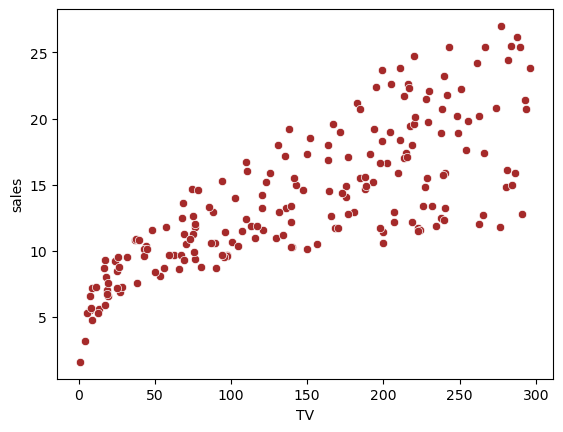

In [10]:
#Scatterplot
sns.scatterplot(x = 'TV', y = 'sales', data = df, color = 'brown' )

<Axes: xlabel='radio', ylabel='sales'>

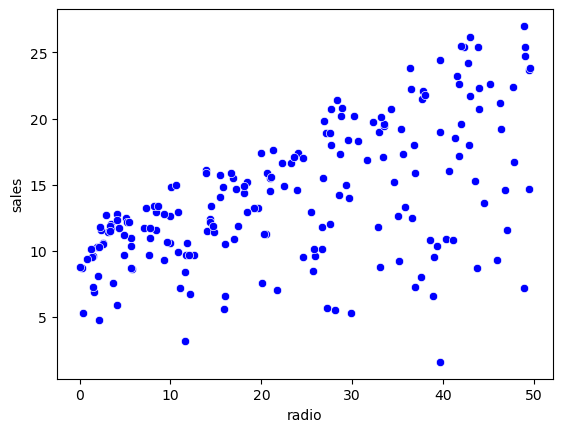

In [11]:
sns.scatterplot(x = 'radio', y = 'sales', data = df, color = 'blue' )

<Axes: xlabel='TV', ylabel='newspaper'>

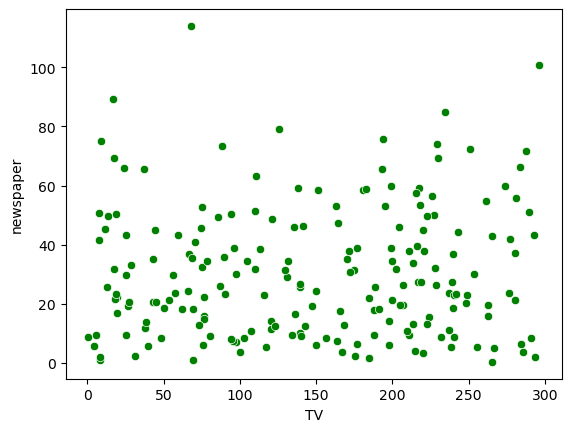

In [12]:
sns.scatterplot(x = 'TV', y = 'newspaper', data = df, color = 'green' )

In [13]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

C:\Users\roych\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\roych\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\roych\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\roych\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

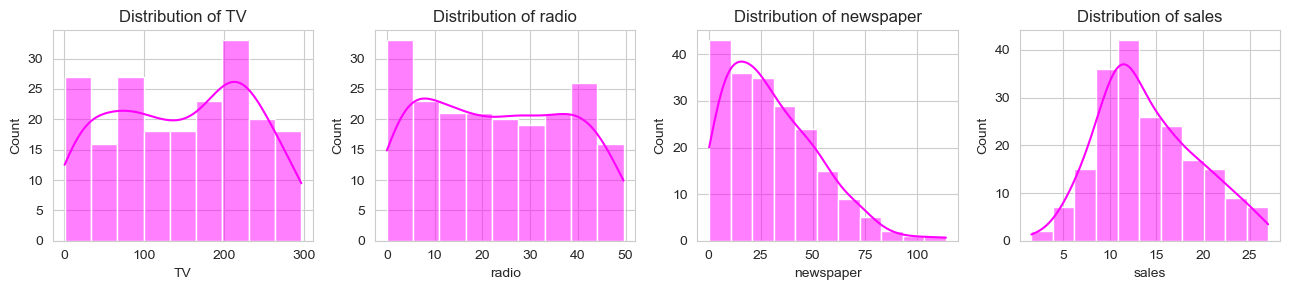

In [14]:
# Histograms for distributions
plt.figure(figsize=(13, 3))
for i, column in enumerate(['TV', 'radio', 'newspaper', 'sales'], start=1):
    plt.subplot(1, 4, i)
    sns.histplot(df[column], kde=True, color = 'magenta')
    plt.title('Distribution of ' + column)
plt.tight_layout()

C:\Users\roych\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\roych\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\roych\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\roych\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

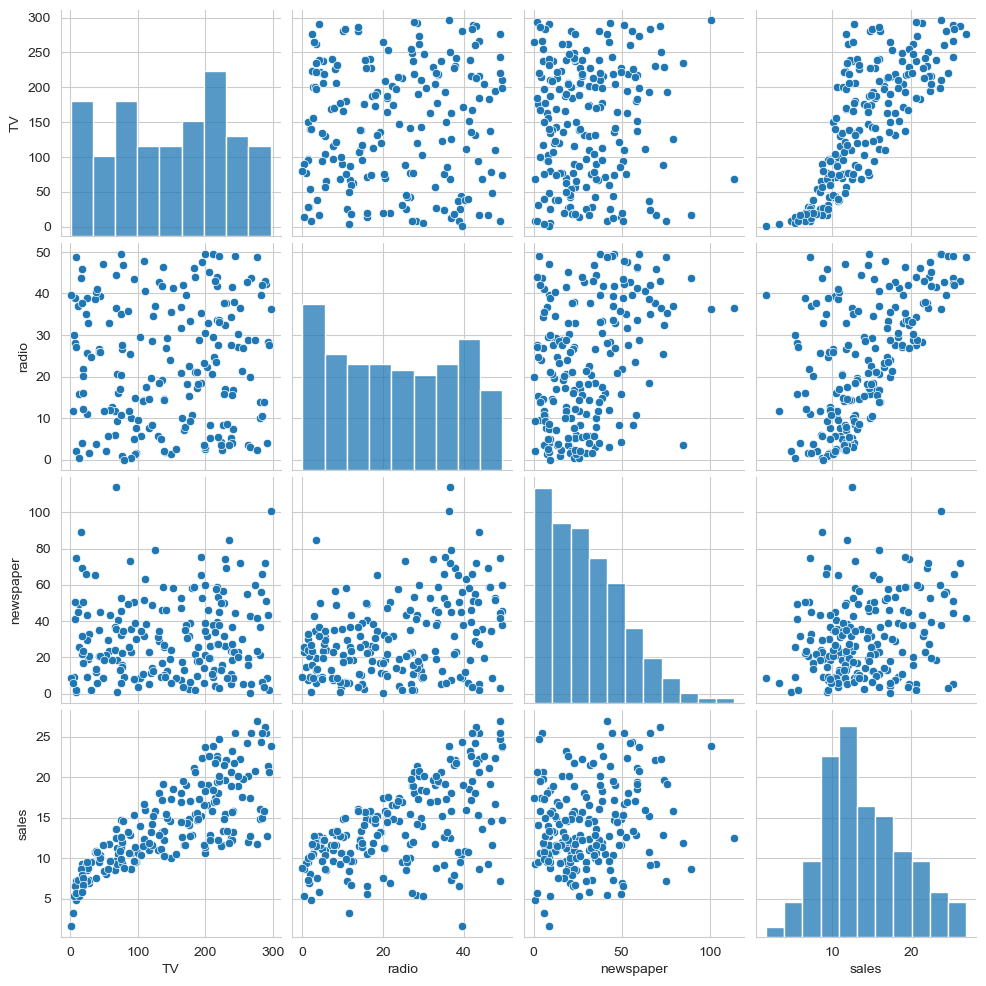

In [15]:
# Pairplot to visualize the relationship between features and sales
sns.pairplot(df)
plt.show()

#### Correlation Matrix

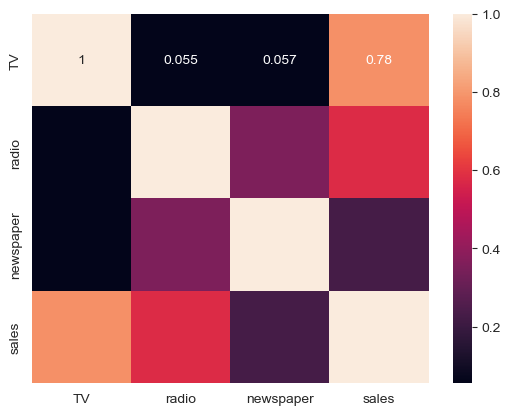

In [16]:
#plotting the heatmap for correlation
ax = sns.heatmap(df.corr(), annot=True)

### Data preparation for modelling

#### Splitting the Train and Test sets

In [17]:
# Defining the features and the target
X = df.drop('sales', axis=1)
y = df['sales']

In [18]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Creating a DataFrame with TV, Radio, Newspaper and Sales
feature_sales_df = pd.DataFrame(data={'TV': X_train['TV'], 'radio': X_train['radio'], 'newspaper': X_train['newspaper'], 'sales': y_train})


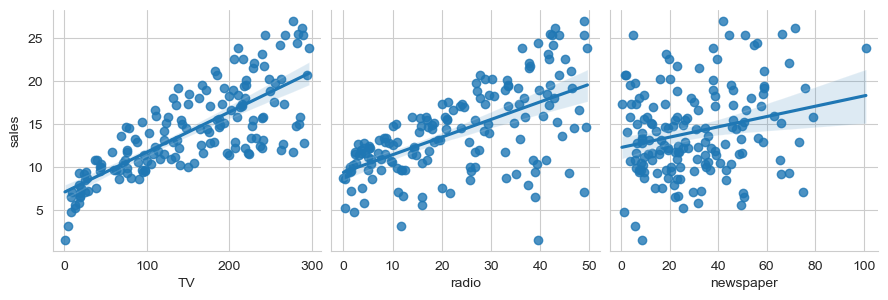

In [20]:
# Pairplot to visualize the correlation between variables
sns.pairplot(feature_sales_df, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=3, aspect=1, kind='reg')
plt.show()

### Modelling and Prediction

__Multiple Linear regression__

In [21]:
# Output of the shape of the training and test sets
print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (160, 3) (160,)
Test set: (40, 3) (40,)


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initializing the Linear Regression model
linear_reg = LinearRegression()

In [23]:

# Training the model
linear_reg.fit(X_train, y_train)


LinearRegression()

In [24]:
# Predicting on the test set
y_pred_linear = linear_reg.predict(X_test)



In [25]:
# Calculating the performance metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)



In [26]:
# Output of the performance metrics
print('Linear Regression MSE:', mse_linear)
print('Linear Regression R-squared:', r2_linear)

Linear Regression MSE: 3.1740973539761046
Linear Regression R-squared: 0.899438024100912


#### Sample Output

In [27]:
output_lr = linear_reg.predict([[180,50,40]])

C:\Users\roych\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [28]:
output_lr[0]

20.600577767865083

__Decision Tree Regression__

In [29]:
from sklearn.tree import DecisionTreeRegressor

In [30]:
# Initializing the Decision Tree Regression model
decision_tree_reg = DecisionTreeRegressor(random_state=42)

In [31]:
# Training the model
decision_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [32]:
# Predicting on the test set
y_pred_decision_tree = decision_tree_reg.predict(X_test)

In [33]:
# Calculating the performance metrics
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

In [34]:
# Output of the performance metrics
print('Decision Tree Regression MSE:', mse_decision_tree)
print('Decision Tree Regression R-squared:', r2_decision_tree)

Decision Tree Regression MSE: 2.175
Decision Tree Regression R-squared: 0.9310914968293178


#### Sample Output

In [35]:
output_dt = decision_tree_reg.predict([[180,50,40]])
output_dt[0]

C:\Users\roych\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


21.2

__Random Forest Regression__

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
# Initializing the Random Forest Regression model
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

In [38]:
# Training the model
random_forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [39]:
# Predicting on the test set
y_pred_random_forest = random_forest_reg.predict(X_test)

In [40]:
# Calculating the performance metrics
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)

In [41]:
# Output of the performance metrics
print('Random Forest Regression MSE:', mse_random_forest)
print('Random Forest Regression R-squared:', r2_random_forest)

Random Forest Regression MSE: 0.5907322499999988
Random Forest Regression R-squared: 0.9812843792541843


#### Sample Output

In [42]:
output_rf = random_forest_reg.predict([[180,50,40]])
output_rf[0]

C:\Users\roych\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


20.87000000000002